## Importing Pandas 

In [1]:
import pandas as pd

df = pd.read_csv('rename.ext') # csv file

df = pd.read_excel('home.xlsx')
df.head()

## Get the Working Directory 

In [5]:
import os
os.getcwd()

'C:\\Users\\study mart\\Downloads\\ML Batch 04\\Class 04'

## Change Working Directory

In [7]:
os.chdir('C:\\Users\\study mart\\Desktop\\New folder')

In [8]:
os.getcwd()

'C:\\Users\\study mart\\Desktop\\New folder'

## Read CSV File

In [9]:
df = pd.read_csv('home2.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df.tail() 

,area,rent
24,2800,50000
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


## Null Checking

In [18]:
#df.isnull().values.any()
df.isnull().sum()

area    0
rent    0
dtype: int64

In [26]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

## Showing & Saving Scatter Plot

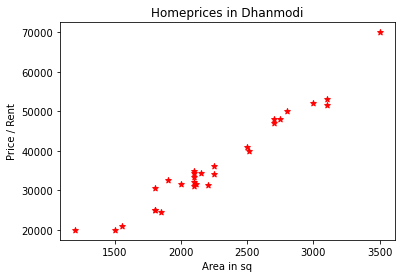

In [33]:
plt.title('Homeprices in Dhanmodi')
plt.xlabel('Area in sq')
plt.ylabel('Price / Rent')
plt.scatter(df['area'],df['rent'],color='red',marker='*') #https://matplotlib.org/stable/api/markers_api.html
#plt.savefig('rename.png')


In [51]:
# Sep dept & Ind Variables
# y = mx + c
x = df[['area']]
y = df['rent']

In [52]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


total data = 100%
train = 70%
test = 30%

## Dividing Training & Testing Data

In [53]:
# split train and test data
from sklearn.model_selection import train_test_split

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70)

In [55]:
xtrain.head()

,area
17,1550
11,2100
3,2250
8,2700
16,1800


In [56]:
ytrain.head()

17    21000
11    32000
3     36100
8     48000
16    30500
Name: rent, dtype: int64

In [57]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [58]:
xtest.shape

(9, 1)

In [59]:
xtrain.shape

(20, 1)

## Linear Regression

In [60]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [61]:
reg = LinearRegression()

In [62]:
reg.fit(xtrain,ytrain) #training your ml model

LinearRegression()

## Predicting value

In [63]:
reg.predict([[2200]])

array([35658.7866702])

In [65]:
m = reg.coef_
c = reg.intercept_
x = 2200
y = m*x + c
y

array([35658.7866702])

In [66]:
reg.coef_

array([19.83693222])

In [67]:
reg.intercept_

-7982.464204954689

In [71]:
ytest

7     24500
24    50000
25    53000
14    34100
9     31000
22    70000
15    51500
18    25000
10    34500
Name: rent, dtype: int64

In [70]:
prediction = reg.predict(xtest)
prediction

array([28715.86039461, 47560.94599979, 53512.02566459, 36650.633281  ,
       33675.0934486 , 61446.79855098, 53512.02566459, 27724.01378381,
       34666.9400594 ])

## Error Detecting

In [68]:
from sklearn.metrics import mean_squared_error

In [72]:
mse = mean_squared_error(ytest,prediction)

In [73]:
mse

13588901.226357684

# Best Fit Line

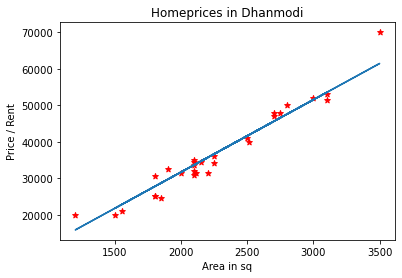

In [76]:
plt.plot(df.area, reg.predict(df[['area']]))
plt.title('Homeprices in Dhanmodi')
plt.xlabel('Area in sq')
plt.ylabel('Price / Rent')
plt.scatter(df['area'],df['rent'],color='red',marker='*') #https://matplotlib.org/stable/api/markers_api.html
#plt.savefig('rename.png')

In [77]:
reg.score(xtest,ytest)

0.935359653035752

# Save Trained Model

In [78]:
import pickle as pk
pk.dump(reg,open('My_Linear_Model_pk','wb')) #write mode 

# Joblib

In [79]:
import joblib as jbl
jbl.dump(reg,'My2')

['My2']

In [80]:
model2 = jbl.load('My2')

In [81]:
model2.predict([[2200]])

array([35658.7866702])